# <span style="color:#9c8f8f"> 75.06/95.58 Organización de Datos</span>
# <span style="color:#9c8f8f"> Análisis exploratorio: Real or Not? NLP with Disaster Tweets</span>

# <center>FEATURE ENGINEERING</center>
# <center>Random Forest</center>

In [172]:
# Cargo librerias

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [173]:
# Cargo train and test

dtype_train = {"id": np.int32, "keyword": "category", "target" : int}
train = pd.read_csv("original_data/train.csv", dtype = dtype_train, encoding='UTF_8')

In [174]:
# Creo dataframe con target

target_train = train[["id","target"]]

In [175]:
DIR_CSV = "features/"

# I) Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

# II) Auxiliary Functions

In [176]:
def get_eficiencia_features_de (df, cantidad_arboles, profundidad_cada_arbol):
    # "desde_col" toma la columna desde la cual se van a evaluar los features
    # "hasta_col" toma la columna hasta la cual se van a evaluar los features
    # "on_col" toma la unica columna para la cual se van a calcular los features que van entre (desde_col,hasta_col)
    vector_aux = []
    on_col = 1
    desde_col = on_col + 1
    hasta_col = -1
    X,y = df.iloc[:,desde_col:hasta_col] , df.iloc[:,on_col]
    X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, random_state = 123)
    rf_model = RandomForestRegressor(random_state = 1, n_estimators = cantidad_arboles, max_depth = profundidad_cada_arbol)
    rf_model.fit(X_train,y_train)
    predicciones = rf_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,predicciones)) 
    feature_importances = rf_model.feature_importances_
    feature_estimators = rf_model.estimators_[0]
    vector_aux.append(X_train)
    vector_aux.append(rmse)
    vector_aux.append(feature_importances)
    vector_aux.append(feature_estimators)
    return vector_aux

In [177]:
def bar_plot_feature_importance (X_train, feature_importance):
    plt.bar(X_train.columns, feature_importance)
    plt.xlabel ('features')
    plt.ylabel ('importancia')
    plt.title ('importancia features con RF')
    plt.rcParams["figure.figsize"] = (8,5)
    plt.show()

In [178]:
def bar_plot_feature_estimators (X_train, feature_estimators):
    
    plt.bar(X_train.columns, feature_estimators.feature_importances_)
    plt.xlabel('features')
    plt.ylabel('importancia')
    plt.title('importancia features del arbol')
    plt.show
    fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10,10), dpi = 200)
    tree.plot_tree(feature_estimators, feature_names = X_train.columns, filled = True)

In [179]:
def csv_to_df_standarized(doc_csv):
    df = pd.read_csv(doc_csv)
    df = df.drop(df.columns[0],axis=1)
    return df
    

In [182]:
dataframe = csv_to_df_standarized('features/train/features_keywords_numerical.csv')
dataframe

,id,target,text_contains_keyword,has_keyword,keywords_quantity,keywords_mean,keyword_is_hashtag,keyword_frequency
0,1,1,1,1,1,0.004525,1,0.227027
1,4,1,1,1,1,0.004525,0,0.237838
2,5,1,1,1,1,0.004525,0,0.210811
3,6,1,1,1,1,0.004525,0,0.210811
4,7,1,1,1,1,0.004525,0,0.237838
...,...,...,...,...,...,...,...,...
7608,10869,1,1,1,1,0.004525,0,0.194595
7609,10870,1,1,1,0,0.000000,0,0.237838
7610,10871,1,1,1,1,0.004525,0,0.151351
7611,10872,1,1,1,3,0.013575,0,0.410811


In [183]:
vector_resultado = get_eficiencia_features_de (dataframe,3,6)

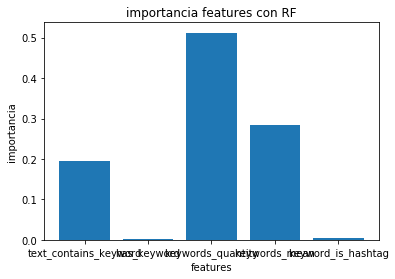

In [184]:
bar_plot_feature_importance(vector_coso[0], vector_resultado[2])

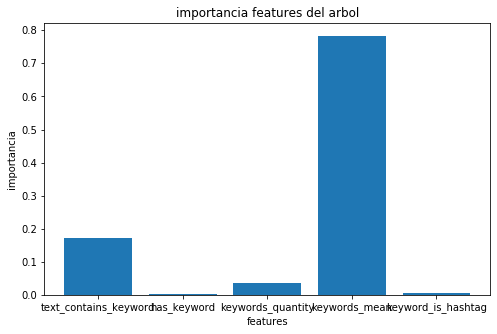

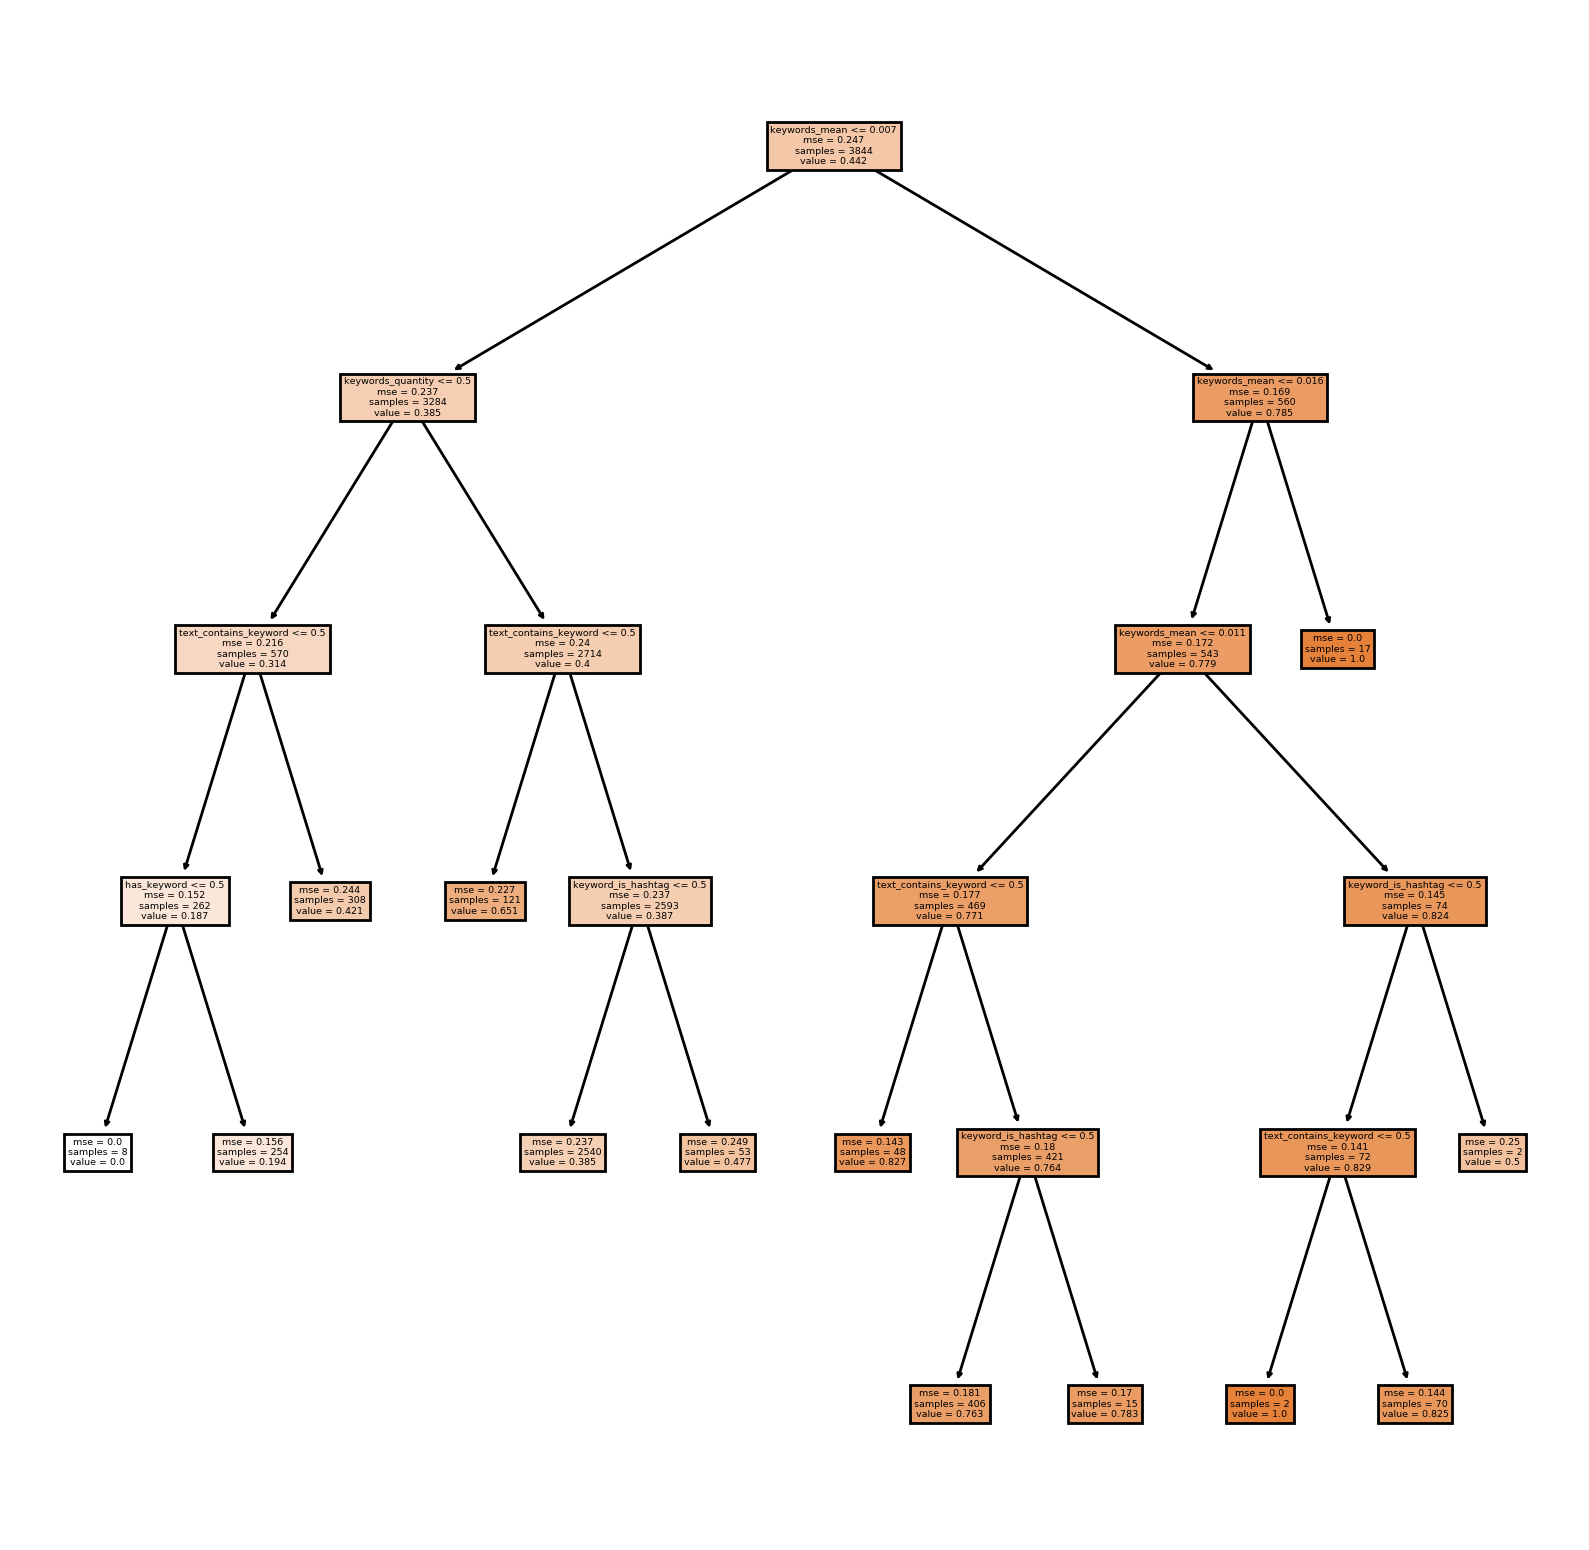

In [185]:
bar_plot_feature_estimators(vector_coso[0], vector_resultado[3])